In [1]:
#Braun_Replication, Analysis of Core/Flexible area
import numpy as np
import pandas as pd
from nilearn import plotting  
import random
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
from colorspacious import cspace_converter
from collections import OrderedDict
import scipy.io
import matplotlib.patches as mpl_patches


In [2]:
#All subjects
lis = []
print(len(lis))

331


In [ ]:
# DataLength=128
# OP=0.95
# TBD=15
# NumofBrainRegions=246
# SavingAddress = "Needed_Address"
# BlockNum = int((DataLength - int(OP*TBD)) / (TBD - int(OP*TBD))) -1
# for subject in lis:
#     MatTot = np.zeros((1,NumofBrainRegions))
#     NumofSampInt = subject
#     WinningModuleTot = np.zeros((1,NumofBrainRegions))
#     for timeblock in range(0,BlockNum): 
#         initial = timeblock*TBD - timeblock*(int(OP*TBD))
#         final = (timeblock+1)*TBD - timeblock*(int(OP*TBD))
#         Mat = np.load(SavingAddress +'/%s/%s/Normalized/Normalized_Subject_%s_FromTime%d_to_%d.npy'%(subject,subject,subject,initial,final))
#         WinningModuleinT = np.zeros((1,NumofBrainRegions))
#         for i in range(0,NumofBrainRegions):
#             WinningModuleinT[0,i] = np.argmax(Mat[:,i])   
#         MatTot = np.concatenate((MatTot,Mat), axis=0)
#         WinningModuleTot = np.concatenate((WinningModuleTot,WinningModuleinT), axis=0)
#     WinningModuleTot = np.delete(WinningModuleTot, (0), axis=0)
#     WinningModuleTot = WinningModuleTot + 1
#     np.save(SavingAddress+ '/%s/%s/Normalized/Normalized_WinningTot_%s.npy'%(subject,subject,subject),WinningModuleTot)
# print(WinningModuleTot)

In [3]:
#give the Brainnetome region numebr(from 0 to 245), get the name and coordination
def region_name(n):
    #input should be a list
    RegTag = list()
    for j in n:
        TagTable = pd.read_csv("Needed_Address",delimiter=";", header='infer', index_col=None)
        RegTag.append(TagTable["Gyrus"][j//2])
    return RegTag
def region_coordinate(n):
    #input should be a list
    RegCorr = list()
    for j in n:
        TagTable = pd.read_csv("Needed_Address",delimiter=";", header='infer', index_col=None)
        if j%2==0:
            RegCorr.append(TagTable["lh.MNI(X,Y,Z)"][j//2])
        if j%2==1:
            RegCorr.append(TagTable["rh.MNI(X,Y,Z)"][j//2])
        
        RegCorr_arr = [int(s) for s in RegCorr[0].split(',')]
    return RegCorr_arr

In [4]:
dmn_coords = list()
SavingAddress = "Needed_Address"
NumofBrainRegions = 246
for subject in lis:
    WinTot = np.load(SavingAddress+ '/%s/%s/Normalized/Normalized_WinningTot_%s.npy'%(subject,subject,subject))
    for reg in range(0,NumofBrainRegions):
        all_modules_spanned = len(np.unique(WinTot[:,reg]))
        if all_modules_spanned<=5:
            #print("sub %s"%subject,"region %d is core"%reg )
            #print(region_name([reg]))
            dmn_coords.append(region_coordinate([reg]))
        #print(all_modules_spanned)

get_colors = lambda n: list(map(lambda i: "#" + "%06x" % random.randint(0, 0xFFFFFF),range(n)))
view = plotting.view_markers(dmn_coords,get_colors(len(dmn_coords)), marker_size=10) # colors-->['red', 'cyan', 'magenta', 'orange']
view.open_in_browser() 

In [ ]:
#Plotting sequence of nilearn
# from nilearn import plotting 
# #Generating random colors
# get_colors = lambda n: list(map(lambda i: "#" + "%06x" % random.randint(0, 0xFFFFFF),range(n)))
# dmn_coords = [region_coordinate([0]),region_coordinate([1]),region_coordinate([2]),region_coordinate([3])]
# get_colors(2)
# view = plotting.view_markers(dmn_coords,get_colors(len(dmn_coords)), marker_size=10) # colors-->['red', 'cyan', 'magenta', 'orange']
# view.open_in_browser() 

In [53]:
# #number of changes that each region performs:
# NumofBrainRegions=246
# SavingAddress = ""Needed_Address""
# for subject in lis:
#     WinTot = np.load(SavingAddress+ '/%s/%s/Normalized/Normalized_WinningTot_%s.npy'%(subject,subject,subject))
#     #print(np.shape(WinTot))
#     Total_change_up_to_t = np.zeros((1,246))
#     for time in range(1,np.shape(WinTot)[0]):
#         for reg in range(0,NumofBrainRegions):
#             if WinTot[time,reg]-WinTot[time-1,reg]!= 0:
#                 Total_change_up_to_t[0,reg] += 1
#     #print(Total_change_up_to_t)
#     np.save(SavingAddress+ '/%s/%s/Normalized/Normalized_TotalNumOfChange_%s.npy'%(subject,subject,subject),Total_change_up_to_t)

In [5]:
SavingAddress = "Needed_Address"
NumofBrainRegions = 246
population_info = np.zeros((len(lis),NumofBrainRegions))
for subject in lis:
    Change_Sum = np.load(SavingAddress+ '/%s/%s/Normalized/Normalized_TotalNumOfChange_%s.npy'%(subject,subject,subject))
    population_info[lis.index(subject),:]= Change_Sum[0,:]

In [6]:
average_change_info = np.mean(population_info,axis=0)
average_change_info = average_change_info/np.max(average_change_info)
print(np.shape(average_change_info))
print(average_change_info)

(246,)
[0.84531237 0.80129903 0.89753013 0.88385608 0.93316811 0.93256987
 0.75950773 0.79360738 0.50961456 0.52457055 0.86855824 0.84223571
 0.88351423 0.8973592  0.88641996 0.86001196 0.75061961 0.78266815
 0.86086659 0.78694129 0.809418   0.81591317 0.82591232 0.76087514
 0.82351936 0.80787967 0.9662422  0.9377831  0.85078198 0.67797624
 0.87949748 0.84950004 0.92248526 0.87565165 0.90582002 0.84761986
 0.90120503 0.82300658 0.86206307 0.79394924 0.91000769 0.89992308
 0.89633365 0.90428169 0.91060593 0.89530809 0.94684215 0.97154089
 0.97025895 1.         0.89026579 0.88086488 0.73805658 0.78078797
 0.74138962 0.7515597  0.57072045 0.64968806 0.68344586 0.67695069
 0.72369883 0.73156141 0.84428681 0.7455773  0.64780788 0.65626869
 0.66054183 0.65968721 0.92607469 0.90616187 0.73711649 0.7031023
 0.64763695 0.70199128 0.73267242 0.81702419 0.90667464 0.85018374
 0.80531578 0.62917699 0.88231775 0.85454235 0.89770105 0.8936843
 0.79497479 0.80044441 0.8277925  0.79796599 0.80702504 0

In [7]:
#Color generating
#minima = min(average_change_info)
minima = 0.7
maxima = max(average_change_info)
print(minima,maxima)

norm = matplotlib.colors.Normalize(vmin=minima, vmax=maxima, clip=True)
print(norm)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.Blues)
colr = np.zeros((4,246))
y = 0
for v in average_change_info:
    #print(v)
    colr[0][y]= mapper.to_rgba(v)[0]
    colr[1][y]= mapper.to_rgba(v)[1]
    colr[2][y]= mapper.to_rgba(v)[2]
    colr[3][y]= mapper.to_rgba(v)[3]
    #print(y,v,mapper.to_rgba(v))
    y+=1
colr_Hex = []
for i in range(0,246):
    colr_Hex.append(matplotlib.colors.to_hex((colr[0,i],colr[1,i],colr[2,i])))
    

#Plotting
dmn_coords = list()
plt.figure()

#indices_bigger = range(0,246)
bigger_than_thrs_nodes = average_change_info > minima #to filter the dots from small values
indices_bigger = [i for i, x in enumerate(bigger_than_thrs_nodes) if x]
print(indices_bigger)

some_colr = []
for reg in indices_bigger:
        dmn_coords.append(region_coordinate([reg]))
        #print(all_modules_spanned)
        some_colr.append(colr_Hex[reg])
view = plotting.view_markers(dmn_coords,some_colr, marker_size=12) # colors-->['red', 'cyan', 'magenta', 'orange']
#plt.colorbar()
plt.show()
view.open_in_browser() 

0.7 1.0
[0, 1, 2, 3, 4, 5, 6, 7, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 60, 61, 62, 63, 68, 69, 70, 71, 73, 74, 75, 76, 77, 78, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 146, 147, 148, 149, 152, 153, 155, 161, 164, 165, 166, 167, 174, 175, 176, 177, 178, 179, 182, 183, 184, 185, 186, 187, 201, 205, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 237, 239, 240, 241, 242, 243, 244, 245]


<Figure size 432x288 with 0 Axes>

In [56]:
len(colr_Hex)

246

In [144]:
matplotlib.colors.to_hex((0.810472895040369, 0.1081122645136486, 0.11972318339100346))

'#cf1c1f'

In [147]:
colr_Hex.index("#000000")

140

In [148]:
colr[0,140],colr[1,140],colr[2,140]

(0.0, 0.0, 0.0)

In [149]:
average_change_info[140]

0.8277924963678317

In [121]:
np.sort(average_change_info)

array([0.21485343, 0.29159901, 0.33638151, 0.38261687, 0.39133407,
       0.44004786, 0.44184258, 0.47739509, 0.49688061, 0.49730792,
       0.50961456, 0.5125203 , 0.51952825, 0.52457055, 0.52619434,
       0.52978378, 0.53405692, 0.54952568, 0.54969661, 0.55123494,
       0.55379882, 0.55388428, 0.55610632, 0.56379797, 0.57072045,
       0.57815571, 0.58123237, 0.5814033 , 0.58935134, 0.5961029 ,
       0.59969233, 0.60217075, 0.60704213, 0.61191351, 0.62917699,
       0.62960431, 0.64618409, 0.64763695, 0.64780788, 0.64789334,
       0.64968806, 0.65575592, 0.65626869, 0.65891804, 0.65968721,
       0.66054183, 0.66327664, 0.66712247, 0.66848987, 0.66994274,
       0.67430134, 0.67695069, 0.67797624, 0.67883087, 0.67934365,
       0.68045466, 0.68344586, 0.68532604, 0.68549697, 0.69045381,
       0.69062473, 0.69652166, 0.70062388, 0.70199128, 0.70250406,
       0.70250406, 0.7031023 , 0.70575165, 0.70694812, 0.71002478,
       0.71241774, 0.71805829, 0.72369883, 0.72822836, 0.72968

(array([ 2.,  1.,  4.,  8., 18., 26., 49., 67., 57., 14.]),
 array([0.21485343, 0.29336809, 0.37188275, 0.4503974 , 0.52891206,
        0.60742672, 0.68594137, 0.76445603, 0.84297069, 0.92148534,
        1.        ]),
 <a list of 10 Patch objects>)

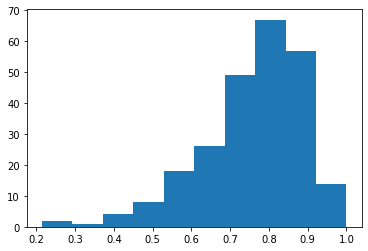

In [122]:
plt.hist(average_change_info)

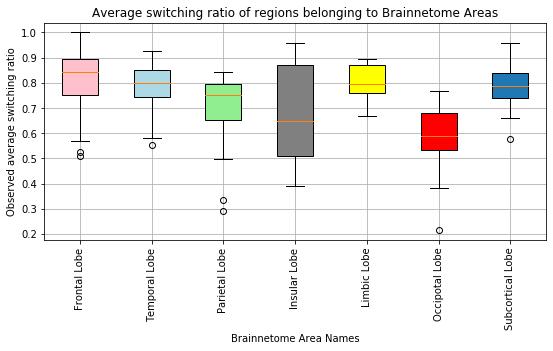

In [271]:
#Finding the switching ratio for brainnetome areas
average_change_info
areas_name = ["Frontal Lobe","Temporal Lobe","Parietal Lobe","Insular Lobe","Limbic Lobe","Occipotal Lobe","Subcortical Lobe"]
#frontal_lobe: 0-67
frontal_lobe_nodes = average_change_info[0:68]
#temporal_lobe: 68-123
temporal_lobe_nodes = average_change_info[68:124]
#parietal_lobe: 124-161
parietal_lobe_nodes = average_change_info[124:162]
#insular_lobe: 162-173
insular_lobe_nodes = average_change_info[162:174]
#limbic_lobe: 174-187
limbic_lobe_nodes = average_change_info[174:188]
#occipital_lobe: 188-209
occipotal_lobe_nodes = average_change_info[188:210]
#subcortical_nuclei: 210-245
subcortical_nuclei_nodes = average_change_info[210:246]
areas_value = [frontal_lobe_nodes,temporal_lobe_nodes,parietal_lobe_nodes,insular_lobe_nodes,limbic_lobe_nodes,occipotal_lobe_nodes,subcortical_nuclei_nodes]

#plotting
all_data = [k for k in areas_value]
#print(all_data)
labels = areas_name

plt.figure(figsize=(9, 4))

# rectangular box plot
bplot1 = plt.boxplot(all_data,
                         vert=True,  # vertical box alignment
                         patch_artist=True,  # fill with color
                         labels=areas_name
                         
                        )  # will be used to label x-ticks
plt.title('Average switching ratio of regions belonging to Brainnetome Areas')

# fill with colors
colors = ['pink', 'lightblue', 'lightgreen','grey','yellow','red']

for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)

# adding horizontal grid lines

plt.grid(True)
plt.xlabel('Brainnetome Area Names')
plt.ylabel('Observed average switching ratio')
plt.xticks(rotation=90)
plt.show()



14
14
(14,)


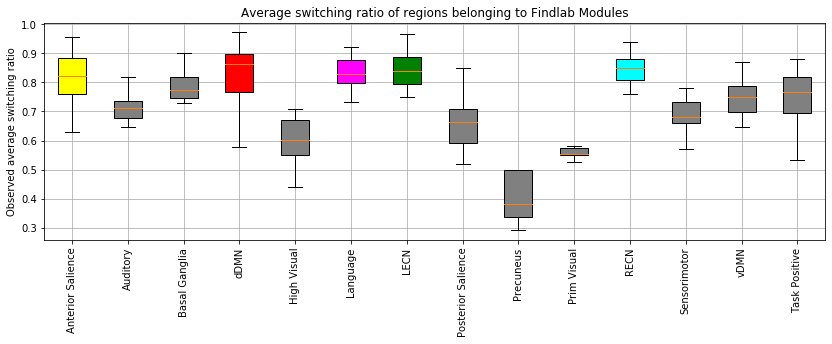

In [34]:
#Finding the switching ratio for Findlab areas
Fiftn_Affil = scipy.io.loadmat("Needed_Address",)
PyMatrix = np.array(Fiftn_Affil["a"])
#collecting indices:
Module1_indices = np.where(PyMatrix == 1)[0]
Module2_indices = np.where(PyMatrix == 2)[0]
Module3_indices = np.where(PyMatrix == 3)[0]
Module4_indices = np.where(PyMatrix == 4)[0]
Module5_indices = np.where(PyMatrix == 5)[0]
Module6_indices = np.where(PyMatrix == 6)[0]
Module7_indices = np.where(PyMatrix == 7)[0]
Module8_indices = np.where(PyMatrix == 8)[0]
Module9_indices = np.where(PyMatrix == 9)[0]
Module10_indices = np.where(PyMatrix == 10)[0]
Module11_indices = np.where(PyMatrix == 11)[0]
Module12_indices = np.where(PyMatrix == 12)[0]
Module13_indices = np.where(PyMatrix == 13)[0]
Module14_indices = np.where(PyMatrix == 14)[0]
#Module15_indices = np.where(PyMatrix == 15)[0]

areas_name = ["Anterior Salience", "Auditory", "Basal Ganglia", "dDMN", "High Visual", "Language", "LECN", "Posterior Salience", "Precuneus", "Prim Visual" ,"RECN", "Sensorimotor", "vDMN", "Task Positive"]
print(len(areas_name))
areas_value = [average_change_info[Module1_indices],average_change_info[Module2_indices],average_change_info[Module3_indices],
              average_change_info[Module4_indices],average_change_info[Module5_indices],average_change_info[Module6_indices],
              average_change_info[Module7_indices],average_change_info[Module8_indices],average_change_info[Module9_indices],
              average_change_info[Module10_indices],average_change_info[Module11_indices],average_change_info[Module12_indices],
              average_change_info[Module13_indices],average_change_info[Module14_indices]]
print(np.size(areas_value))
#plotting
all_data = [k for k in areas_value]
print(np.shape(all_data))

plt.figure(figsize=(14, 4))

# rectangular box plot
bplot1 = plt.boxplot(all_data,
                         vert=True,  # vertical box alignment
                         patch_artist=True,  # fill with color
                         labels=areas_name,
                         showfliers= False
                    )  # will be used to label x-ticks
plt.title('Average switching ratio of regions belonging to Findlab Modules')

# fill with colors
#colors = ['pink', 'lightblue', 'lightgreen','grey','yellow','red','purple','brown','green','cyan','gold','lightcoral','olive','darkorange','royalblue']
colors = ['yellow', 'grey', 'grey','red','grey','magenta','green','grey','grey','grey','cyan','grey','grey','grey']

for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)

# adding horizontal grid lines
#plt.legend(['yellow', 'grey', 'grey','red','grey','grey','green','grey','grey','grey','cyan','grey','grey','blue'],bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
#plt.xlabel('Findlab Module Names')
plt.ylabel('Observed average switching ratio')
plt.xticks(rotation=90)
plt.show()


In [282]:
np.argmax(average_change_info)

49

In [285]:
average_change_info.argsort()

array([195, 151, 150, 206, 171, 192, 170, 163, 159, 207,   8, 198, 162,
         9, 196, 144, 158, 199, 190, 191, 197, 105, 131, 173,  56, 236,
       193, 104, 130, 145, 189, 203, 202, 188,  79, 172, 160,  72,  64,
       157,  57, 194,  65, 238,  67,  66, 103, 180, 156, 169, 129,  59,
        29, 154, 107, 118,  58, 168, 106, 200, 204, 181, 208,  73, 102,
       205,  71, 235, 201, 234, 155, 161,  60, 243, 139, 237,  61, 240,
        74, 125, 245, 119,  70,  52, 230, 220, 231, 148,  54, 111,  63,
       244, 133, 152,  16, 221, 126, 153,  55, 182,   6, 149,  23, 183,
       185, 228, 184, 128, 124, 109, 225, 229, 209, 134, 135, 123, 224,
        53, 175,  17,  96, 239, 100,  19, 108, 232, 101, 217,  94,  95,
         7, 136, 216,  39, 138,  89,  84, 233,  90,  87,  97,  85,   1,
       143, 174, 137,  78,  88, 110, 147,  25,  20, 146, 132, 142,  21,
       241,  75,  37,  24,  22,  91, 122, 242, 140,  86, 121, 222, 127,
       227, 219, 120, 141,  11, 177,  62,   0,  93, 115, 226,  3

<Figure size 720x3600 with 0 Axes>

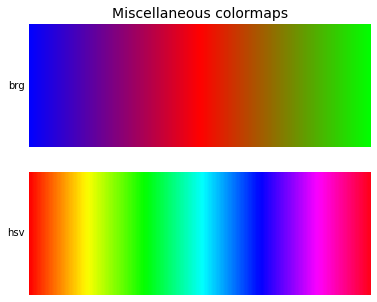

In [157]:
plt.cm.get_cmap("brg")
"""
==================
Colormap reference
==================

Reference for colormaps included with Matplotlib.

This reference example shows all colormaps included with Matplotlib. Note that
any colormap listed here can be reversed by appending "_r" (e.g., "pink_r").
These colormaps are divided into the following categories:

Sequential:
    These colormaps are approximately monochromatic colormaps varying smoothly
    between two color tones---usually from low saturation (e.g. white) to high
    saturation (e.g. a bright blue). Sequential colormaps are ideal for
    representing most scientific data since they show a clear progression from
    low-to-high values.

Diverging:
    These colormaps have a median value (usually light in color) and vary
    smoothly to two different color tones at high and low values. Diverging
    colormaps are ideal when your data has a median value that is significant
    (e.g.  0, such that positive and negative values are represented by
    different colors of the colormap).

Qualitative:
    These colormaps vary rapidly in color. Qualitative colormaps are useful for
    choosing a set of discrete colors. For example::

        color_list = plt.cm.Set3(np.linspace(0, 1, 12))

    gives a list of RGB colors that are good for plotting a series of lines on
    a dark background.

Miscellaneous:
    Colormaps that don't fit into the categories above.

"""
import numpy as np
import matplotlib.pyplot as plt


# Have colormaps separated into categories:
# http://matplotlib.org/examples/color/colormaps_reference.html
cmaps = [('Miscellaneous', [ 'brg', 'hsv'])]


nrows = max(len(cmap_list) for cmap_category, cmap_list in cmaps)
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(cmap_category, cmap_list, nrows):
    plt.figure(figsize=(10,50))
    fig, axes = plt.subplots(nrows=nrows)
    fig.subplots_adjust(top=0.95, bottom=0.01, left=0.2, right=0.99)
    axes[0].set_title(cmap_category + ' colormaps', fontsize=14)

    for ax, name in zip(axes, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
        pos = list(ax.get_position().bounds)
        x_text = pos[0] - 0.01
        y_text = pos[1] + pos[3]/2.
        fig.text(x_text, y_text, name, va='center', ha='right', fontsize=10)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axes:
        ax.set_axis_off()


for cmap_category, cmap_list in cmaps:
    plot_color_gradients(cmap_category, cmap_list, nrows)

plt.show()

# Separating the blocks

In [1]:
#We want to seperate the blocks now:
# Windows (above or more than 12 shares in) 0-back:
# 0-1-2-3/27-28-29-30-31-32-33/57-58-59-60-61-62-63/87-88-89-90-91-92-93/
# Windows (above or more than 12 shares in) 2-back:
# 12-13-14-15-16-17-18/42-43-44-45-46-47-48/72-73-74-75-76-77-78/102-103-104-105-106-107-108
ZeroBBlocksWindows = [0,1,2,3,27,28,29,30,31,32,33,57,58,59,60,61,62,63,87,88,89,90,91,92,93]
TwoBBlockWindows = [12,13,14,15,16,17,18,42,43,44,45,46,47,48,72,73,74,75,76,77,78,102,103,104,105,106,107,108]

In [ ]:
population_info = np.zeros((len(lis),NumofBrainRegions))
for subject in lis:
    Change_Sum = np.load(SavingAddress+ '/%s/%s/Normalized/Normalized_TotalNumOfChange_%s.npy'%(subject,subject,subject))
    population_info[lis.index(subject),:]= Change_Sum[0,:]

In [ ]:
average_change_info = np.mean(population_info,axis=0)
average_change_info = average_change_info/np.max(average_change_info)
print(np.shape(average_change_info))
print(average_change_info)

In [7]:
SavingAddress = "Needed_Address"
for subject in ['id']:
    Change_Sum = np.load(SavingAddress+ '/%s/%s/Normalized/Normalized_TotalNumOfChange_%s.npy'%(subject,subject,subject))

In [11]:
#number of changes that each region performs:
NumofBrainRegions=246
SavingAddress = "Needed_Address"
for subject in ['id1']:
    WinTot = np.load(SavingAddress+ '/%s/%s/Normalized/Normalized_WinningTot_%s.npy'%(subject,subject,subject))
    # WinTot rows are windows and columns are nodes
    print(np.shape(WinTot))
#     Total_change_up_to_t = np.zeros((1,246))
#     for time in range(1,np.shape(WinTot)[0]):
#         for reg in range(0,NumofBrainRegions):
#             if WinTot[time,reg]-WinTot[time-1,reg]!= 0:
#                 Total_change_up_to_t[0,reg] += 1
#     #print(Total_change_up_to_t)
#     np.save(SavingAddress+ '/%s/%s/Normalized/Normalized_TotalNumOfChange_%s.npy'%(subject,subject,subject),Total_change_up_to_t)

(113, 246)


In [19]:
np.shape(WinTot[TwoBBlockWindows,:])



(28, 246)

In [23]:
Modules=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

WinTot[TwoBBlockWindows,:][1,:]




array([11., 11.,  5.,  5.,  1.,  5., 11., 11., 11., 11., 11.,  8.,  1.,
        4.,  5., 11.,  3., 11., 10., 11., 11., 11., 11., 11., 11., 11.,
        9.,  7., 11., 11.,  3., 11.,  5.,  3.,  3.,  3.,  3., 11.,  3.,
       11., 11.,  1.,  7., 14.,  9., 11., 11.,  1., 15.,  7.,  3.,  3.,
        8.,  8., 11., 11.,  5.,  5.,  5., 12.,  2.,  2., 11., 11., 12.,
       12., 12.,  5., 15., 15.,  8.,  2.,  2.,  2.,  3.,  7.,  3.,  3.,
        2.,  3.,  5.,  3., 15., 15.,  3., 11.,  2.,  3., 15., 15.,  6.,
        3., 15., 15., 15., 15.,  3., 11., 15.,  3.,  7., 15., 15., 15.,
        3.,  5.,  3.,  3., 15., 15.,  5., 15.,  5.,  5., 15., 15., 15.,
       15.,  8.,  5.,  3.,  3.,  1., 11., 10.,  5., 14., 11., 11., 11.,
        5.,  5., 11., 11., 11.,  5., 11., 11.,  3., 11., 11., 11.,  5.,
       11.,  1.,  2., 14., 11.,  5.,  5., 10., 10., 10., 10.,  2.,  5.,
        2.,  2., 12.,  8.,  5.,  5.,  2.,  2., 11., 11.,  3., 11.,  2.,
        2.,  2.,  2.,  1.,  1., 12., 12.,  5.,  5., 15.,  3., 12

In [29]:
Module_Dist = np.load("Needed_Address") 
print(np.shape(Module_Dist))
ModulePopTwoBack = Module_Dist[:,TwoBBlockWindows]
ModulePopZeroBack = Module_Dist[:,ZeroBBlocksWindows]
print(np.shape(ModulePopTwoBack))
print(np.shape(ModulePopZeroBack))

(15, 113)
(15, 28)
(15, 25)


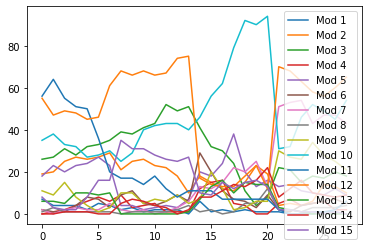

In [37]:
plt.plot(ModulePopTwoBack.T)
label = ["Mod 1","Mod 2","Mod 3","Mod 4","Mod 5","Mod 6","Mod 7","Mod 8","Mod 9","Mod 10","Mod 11","Mod 12","Mod 13","Mod 14","Mod 15"]
plt.legend(label)
#plt.plot(ModulePopZeroBack)

(15,)
(15,)


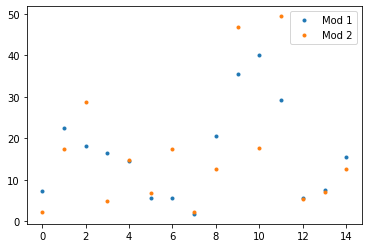

In [52]:
meansZero = np.mean(ModulePopZeroBack,axis =1)
print(np.shape(np.mean(ModulePopZeroBack,axis =1)))
plt.plot(meansZero,".")
label = ["Mod 1","Mod 2","Mod 3","Mod 4","Mod 5","Mod 6","Mod 7","Mod 8","Mod 9","Mod 10","Mod 11","Mod 12","Mod 13","Mod 14","Mod 15"]
plt.legend(label)

meansTwo = np.mean(ModulePopTwoBack,axis =1)
print(np.shape(np.mean(ModulePopZeroBack,axis =1)))
plt.plot(meansTwo,".")
label = ["Mod 1","Mod 2","Mod 3","Mod 4","Mod 5","Mod 6","Mod 7","Mod 8","Mod 9","Mod 10","Mod 11","Mod 12","Mod 13","Mod 14","Mod 15"]
plt.legend(label)



15
420
(15, 28)


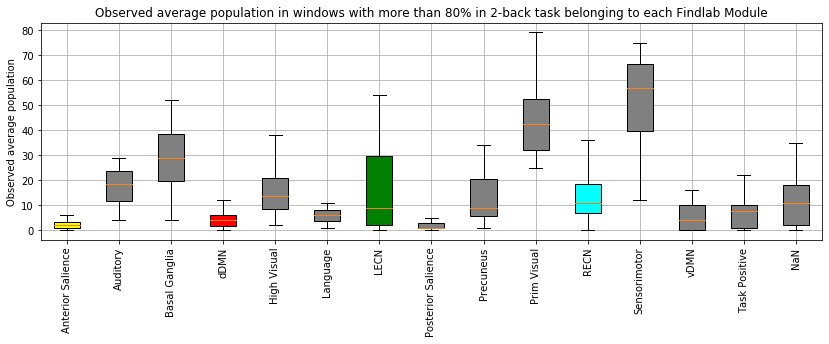

In [60]:
#Finding the switching ratio for Findlab areas
Fiftn_Affil = scipy.io.loadmat("Needed_Address",)
PyMatrix = np.array(Fiftn_Affil["a"])
#collecting indices:
# Module1_indices = np.where(PyMatrix == 1)[0]
# Module2_indices = np.where(PyMatrix == 2)[0]
# Module3_indices = np.where(PyMatrix == 3)[0]
# Module4_indices = np.where(PyMatrix == 4)[0]
# Module5_indices = np.where(PyMatrix == 5)[0]
# Module6_indices = np.where(PyMatrix == 6)[0]
# Module7_indices = np.where(PyMatrix == 7)[0]
# Module8_indices = np.where(PyMatrix == 8)[0]
# Module9_indices = np.where(PyMatrix == 9)[0]
# Module10_indices = np.where(PyMatrix == 10)[0]
# Module11_indices = np.where(PyMatrix == 11)[0]
# Module12_indices = np.where(PyMatrix == 12)[0]
# Module13_indices = np.where(PyMatrix == 13)[0]
# Module14_indices = np.where(PyMatrix == 14)[0]
#Module15_indices = np.where(PyMatrix == 15)[0]

areas_name = ["Anterior Salience", "Auditory", "Basal Ganglia", "dDMN", "High Visual", "Language", "LECN", "Posterior Salience", "Precuneus", "Prim Visual" ,"RECN", "Sensorimotor", "vDMN", "Task Positive","NaN"]
print(len(areas_name))
areas_value = [ModulePopTwoBack[0,:],ModulePopTwoBack[1,:],ModulePopTwoBack[2,:],ModulePopTwoBack[3,:],ModulePopTwoBack[4,:],
              ModulePopTwoBack[5,:],ModulePopTwoBack[6,:],ModulePopTwoBack[7,:],ModulePopTwoBack[8,:],ModulePopTwoBack[9,:],
              ModulePopTwoBack[10,:],ModulePopTwoBack[11,:],ModulePopTwoBack[12,:],ModulePopTwoBack[13,:],ModulePopTwoBack[14,:]]
print(np.size(areas_value))
#plotting
all_data = [k for k in areas_value]
print(np.shape(all_data))

plt.figure(figsize=(14, 4))

# rectangular box plot
bplot1 = plt.boxplot(all_data,
                         vert=True,  # vertical box alignment
                         patch_artist=True,  # fill with color
                         labels=areas_name,
                         showfliers= False
                    )  # will be used to label x-ticks
plt.title('Observed average population in windows with more than 80% in 2-back task belonging to each Findlab Module')

# fill with colors
#colors = ['pink', 'lightblue', 'lightgreen','grey','yellow','red','purple','brown','green','cyan','gold','lightcoral','olive','darkorange','royalblue']
colors = ['yellow', 'grey', 'grey','red','grey','grey','green','grey','grey','grey','cyan','grey','grey','grey','grey']

for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)

# adding horizontal grid lines
#plt.legend(['yellow', 'grey', 'grey','red','grey','grey','green','grey','grey','grey','cyan','grey','grey','blue'],bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
#plt.xlabel('Findlab Module Names')
plt.ylabel('Observed average population')
plt.xticks(rotation=90)
plt.show()


15
375
(15, 25)


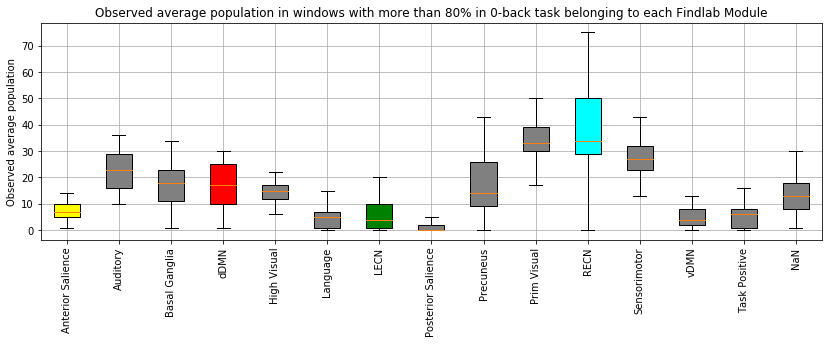

In [61]:
areas_name = ["Anterior Salience", "Auditory", "Basal Ganglia", "dDMN", "High Visual", "Language", "LECN", "Posterior Salience", "Precuneus", "Prim Visual" ,"RECN", "Sensorimotor", "vDMN", "Task Positive","NaN"]
print(len(areas_name))
areas_value = [ModulePopZeroBack[0,:],ModulePopZeroBack[1,:],ModulePopZeroBack[2,:],ModulePopZeroBack[3,:],ModulePopZeroBack[4,:],
              ModulePopZeroBack[5,:],ModulePopZeroBack[6,:],ModulePopZeroBack[7,:],ModulePopZeroBack[8,:],ModulePopZeroBack[9,:],
              ModulePopZeroBack[10,:],ModulePopZeroBack[11,:],ModulePopZeroBack[12,:],ModulePopZeroBack[13,:],ModulePopZeroBack[14,:]]
print(np.size(areas_value))
#plotting
all_data = [k for k in areas_value]
print(np.shape(all_data))

plt.figure(figsize=(14, 4))

# rectangular box plot
bplot1 = plt.boxplot(all_data,
                         vert=True,  # vertical box alignment
                         patch_artist=True,  # fill with color
                         labels=areas_name,
                         showfliers= False
                    )  # will be used to label x-ticks
plt.title('Observed average population in windows with more than 80% in 0-back task belonging to each Findlab Module')

# fill with colors
#colors = ['pink', 'lightblue', 'lightgreen','grey','yellow','red','purple','brown','green','cyan','gold','lightcoral','olive','darkorange','royalblue']
colors = ['yellow', 'grey', 'grey','red','grey','grey','green','grey','grey','grey','cyan','grey','grey','grey','grey']

for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)

# adding horizontal grid lines
#plt.legend(['yellow', 'grey', 'grey','red','grey','grey','green','grey','grey','grey','cyan','grey','grey','blue'],bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
#plt.xlabel('Findlab Module Names')
plt.ylabel('Observed average population')
plt.xticks(rotation=90)
plt.show()


In [ ]:
#number of changes that each region performs:
NumofBrainRegions=246
SavingAddress ="Needed_Address"
for subject in lis:
    print("subject %s is being processed"%subject)
    WinTot = np.load(SavingAddress+ '/%s/%s/Normalized/Normalized_WinningTot_%s.npy'%(subject,subject,subject))
    # WinTot rows are windows and columns are nodes
    print(np.shape(WinTot))
    Total_change_in_zeroback = np.zeros((1,246))
    Total_change_in_zeroback = np.zeros((1,246))

    for time in :
        for reg in range(0,NumofBrainRegions):
            if WinTot[time,reg]-WinTot[time-1,reg]!= 0:
                Total_change_up_to_t[0,reg] += 1
    #print(Total_change_up_to_t)
    np.save(SavingAddress+ '/%s/%s/Normalized/Normalized_TotalNumOfChange_%s.npy'%(subject,subject,subject),Total_change_up_to_t)

In [8]:
#Analysis of only top 80% flexibility:
NumofBrainRegions=246
population_info = np.zeros((len(lis),NumofBrainRegions))
for subject in ["PSY00025"]:
    Change_Sum = np.load("Needed_Address")
    print(np.shape(Change_Sum))
    #population_info[lis.index(subject),:]= Change_Sum[0,:]


(1, 246)


In [27]:
list(lis).index("PSY00022")

0

In [5]:
population_change_zeroback = np.zeros((331,246))
population_change_twoback = np.zeros((331,246))

for subject in lis: 
    Total_change_in_twoback_norm = np.load("Needed_Address")
    Total_change_in_zeroback_norm = np.load("Needed_Address")
    population_change_zeroback[list(lis).index(subject),:] = Total_change_in_zeroback_norm
    population_change_twoback[list(lis).index(subject),:] = Total_change_in_twoback_norm
    
Average_population_change_zeroback  = np.mean(population_change_zeroback,axis = 0)
Average_population_change_twoback  = np.mean(population_change_twoback,axis = 0)

In [56]:
#Color generating
NumofBrainRegions = 246
average_change_info = Average_population_change_twoback - Average_population_change_zeroback
minima = min(average_change_info)
print(minima)
maxima = max(average_change_info)

norm = matplotlib.colors.Normalize(vmin=minima, vmax=maxima, clip=True)
#mapper = cm.ScalarMappable(norm=norm, cmap=cm.Greys)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.brg)
#mapper = cm.ScalarMappable(norm=norm, cmap=cm.autumn)
colr = np.zeros((4,246))
y = 0
for v in average_change_info:
    #print(v)
    colr[0][y]= mapper.to_rgba(v)[0]
    colr[1][y]= mapper.to_rgba(v)[1]
    colr[2][y]= mapper.to_rgba(v)[2]
    colr[3][y]= mapper.to_rgba(v)[3]
    y = y+1
    #print(mapper.to_rgba(v))
colr_Hex = []
for i in range(0,246):
    colr_Hex.append(matplotlib.colors.to_hex((colr[0,i],colr[1,i],colr[2,i])))
    

#Plotting
dmn_coords = list()
plt.figure()
for reg in range(0,NumofBrainRegions):
    if reg not in mid_level_node_indices:
        dmn_coords.append(region_coordinate([reg]))

view = plotting.view_markers(dmn_coords,colr_Hex, marker_size=12) # colors-->['red', 'cyan', 'magenta', 'orange']
#plt.colorbar("brg")
plt.show()
view.open_in_browser() 

-0.05613293051359483


<Figure size 432x288 with 0 Axes>

In [24]:
np.shape(list(Average_population_change_zeroback))

(1, 246)

In [42]:
print(np.min(average_change_info))
print(np.max(average_change_info))

-0.05613293051359483
0.020293482952093544


(array([ 1.,  2.,  1., 10., 30., 22., 36., 46., 38., 24., 13., 12.,  8.,
         1.,  1.,  1.,  0.]),
 array([-0.06 , -0.055, -0.05 , -0.045, -0.04 , -0.035, -0.03 , -0.025,
        -0.02 , -0.015, -0.01 , -0.005,  0.   ,  0.01 ,  0.015,  0.02 ,
         0.025,  0.03 ]),
 <a list of 17 Patch objects>)

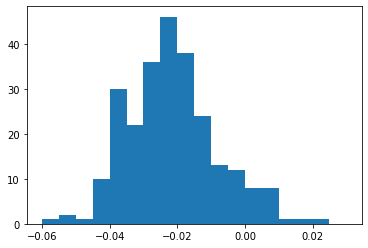

In [105]:
plt.hist(average_change_info,bins=[-0.06,-0.055,-0.05,-0.045,-0.04,0.035,-0.03,-0.025,-0.02,-0.015,-0.01,-0.005,0,0.01,0.015,0.02,0.025,0.03])

In [109]:
average_change_info = [np.nan if -0.04 < average_change_info_ < -0.0 else average_change_info_ for average_change_info_ in average_change_info]
print(average_change_info)

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.015006473888649507, nan, nan, 0.0013983599482090825, 0.005817867932671611, 0.003517479499353132, nan, 0.010444540353906268, nan, nan, nan, nan, 0.0031722054380667886, 0.020293482952093544, nan, nan, nan, nan, nan, nan, nan, 0.0008372895986192841, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.00488562796719938, nan, nan, nan, nan, nan, nan, 0.0065688390159692744, nan, nan, nan, nan, nan, nan, nan, -0.0414242555028054, nan, nan, nan, nan, nan, nan, -0.045373327578765554, nan, -0.040448856279672096, nan, nan, -0.04497194648252015, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, -0.04063012516184686, nan, nan, nan, nan, nan, nan, nan, nan, nan, -0.04065170479067745, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan

(array([ 1.,  2.,  1., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,
         1.,  1.,  1.,  0.]),
 array([-0.06 , -0.055, -0.05 , -0.045, -0.04 , -0.035, -0.03 , -0.025,
        -0.02 , -0.015, -0.01 , -0.005,  0.   ,  0.01 ,  0.015,  0.02 ,
         0.025,  0.03 ]),
 <a list of 17 Patch objects>)

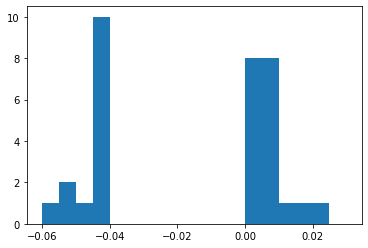

In [110]:
plt.hist(average_change_info,bins=[-0.06,-0.055,-0.05,-0.045,-0.04,-0.035,-0.03,-0.025,-0.02,-0.015,-0.01,-0.005,0,0.01,0.015,0.02,0.025,0.03])

In [13]:
mid_level_node_indices = []
for i in average_change_info:
    if i < 0.0:
        mid_level_node_indices.append(list(average_change_info).index(i))

print(mid_level_node_indices)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 22, 24, 25, 26, 27, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 57, 58, 59, 60, 61, 62, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 225, 226, 227, 228, 229, 230,

In [109]:
import csv

with open('/Users/jess/Desktop/scores_2back.csv', mode='r') as infile:
    reader = csv.reader(infile,delimiter=";")
    for row in reader:
        print(row[0],row[1])
        mydict = {rows[0]:rows[1] for rows in reader}


In [110]:
len(mydict)

310

In [111]:
score_vs_change = np.zeros((len(mydict),11))
#4 columns for: 1-score and integration valus for in 2-visuospatial/0back 3-RECN/0back 4-LECN/0back 5- Anterioir Salience/0back 6- dDMN/0beck 7-visuospatial/2back 8-RECN/2back 9-LECN/2back, 10- Anterioir alience/2back  11- dDMN/2beck  
count = 0
for subject in mydict.keys():
    # Total_change_in_twoback_norm = np.load("Needed_Address")
    # Total_change_in_zeroback_norm = np.load("Needed_Address")
    R_zeroback = np.load("Needed_Address")
    R_twoback = np.load("Needed_Address")
    Module_Integration_zeroback = np.sum(R_zeroback, axis=1)
    Module_Integration_twoback = np.sum(R_twoback, axis=1)
    #score
    score_vs_change[count,0] = mydict[subject]
    #visuospatial/0back
    score_vs_change[count,1] = Module_Integration_zeroback[13]  
    #RECN/0back
    score_vs_change[count,2] = Module_Integration_zeroback[10]
    #LECN/0back
    score_vs_change[count,3] = Module_Integration_zeroback[6]
    #Anterioir Salience/0back
    score_vs_change[count,4] = Module_Integration_zeroback[0]
    #dDMN/0beck
    score_vs_change[count,5] = Module_Integration_zeroback[3]
    #visuospatial/2back
    score_vs_change[count,6] = Module_Integration_twoback[13]
    #RECN/2back
    score_vs_change[count,7] = Module_Integration_twoback[10]
    #LECN/2back
    score_vs_change[count,8] = Module_Integration_twoback[6]
    #Anterioir Salience/2back
    score_vs_change[count,9] = Module_Integration_twoback[0]
    #dDMN/2beck
    score_vs_change[count,10] = Module_Integration_twoback[3]
    count += 1
print(count)

310


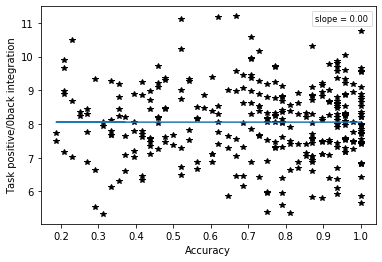

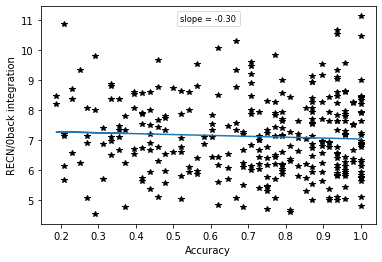

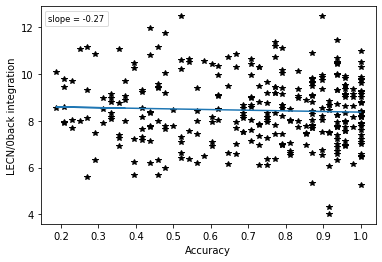

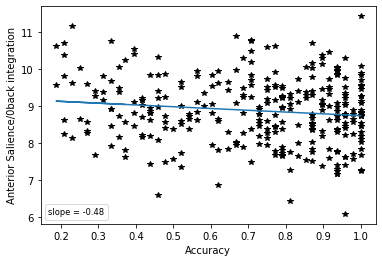

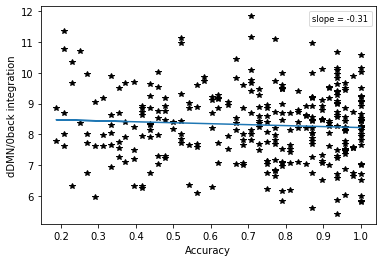

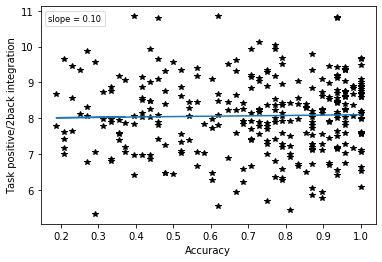

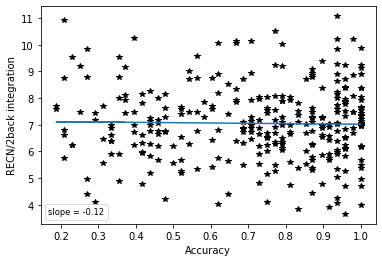

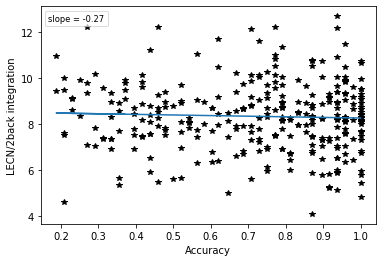

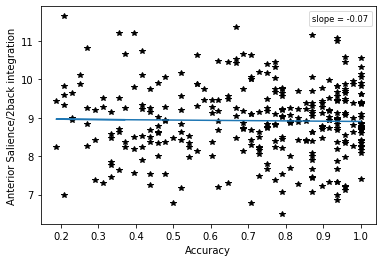

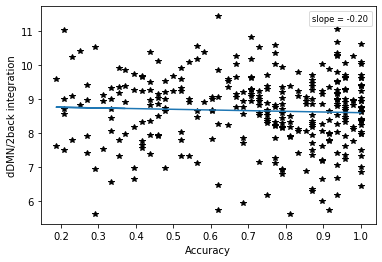

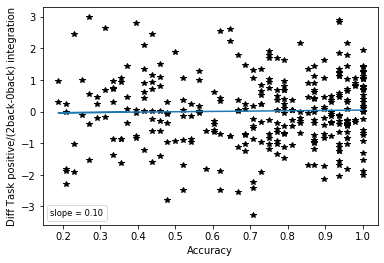

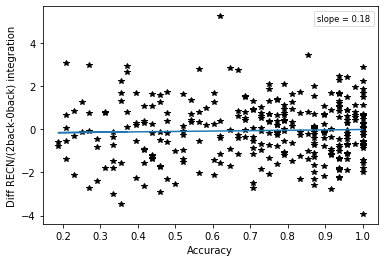

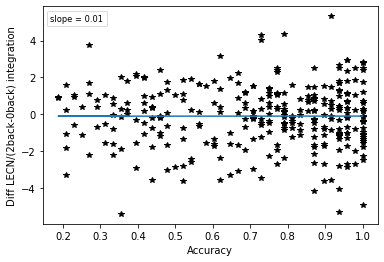

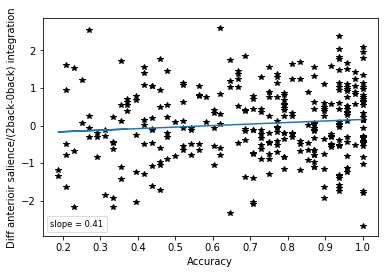

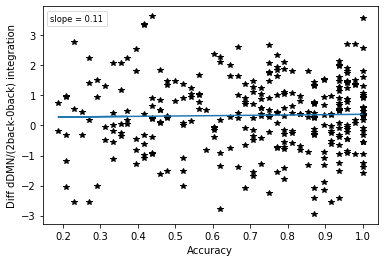

In [112]:
# create a list with two empty handles
handles = [mpl_patches.Rectangle((0, 0), 1, 1, fc="white", ec="white", 
                                 lw=0, alpha=0)] * 2

##############
plt.figure()
plt.plot(score_vs_change[:,0],score_vs_change[:,1],"*",color="black")
m, b = np.polyfit(score_vs_change[:,0], score_vs_change[:,1], 1)
plt.plot(score_vs_change[:,0], m*score_vs_change[:,0] + b)
plt.ylabel("Task positive/0back integration")
plt.xlabel("Accuracy")
labels = ["slope = %.2f"%m,]
plt.legend(handles, labels, loc='best', fontsize='small', fancybox=True, framealpha=0.7, handlelength=0, handletextpad=0)
plt.savefig("Task positive-0back integration vs score.png")

plt.figure()
plt.plot(score_vs_change[:,0],score_vs_change[:,2],"*",color="black")
m, b = np.polyfit(score_vs_change[:,0], score_vs_change[:,2], 1)
plt.plot(score_vs_change[:,0], m*score_vs_change[:,0] + b)
plt.ylabel("RECN/0back integration")
plt.xlabel("Accuracy")
labels = ["slope = %.2f"%m,]
plt.legend(handles, labels, loc='best', fontsize='small', fancybox=True, framealpha=0.7, handlelength=0, handletextpad=0)
plt.savefig("RECN-0back integration vs score.png")

plt.figure()
plt.plot(score_vs_change[:,0],score_vs_change[:,3],"*",color="black")
m, b = np.polyfit(score_vs_change[:,0], score_vs_change[:,3], 1)
plt.plot(score_vs_change[:,0], m*score_vs_change[:,0] + b)
plt.ylabel("LECN/0back integration")
plt.xlabel("Accuracy")
labels = ["slope = %.2f"%m,]
plt.legend(handles, labels, loc='best', fontsize='small', fancybox=True, framealpha=0.7, handlelength=0, handletextpad=0)
plt.savefig("LECN-0back integration vs score.png")

plt.figure()
plt.plot(score_vs_change[:,0],score_vs_change[:,4],"*",color="black")
m, b = np.polyfit(score_vs_change[:,0], score_vs_change[:,4], 1)
plt.plot(score_vs_change[:,0], m*score_vs_change[:,0] + b)
plt.ylabel("Anterior Salience/0back integration")
plt.xlabel("Accuracy")
labels = ["slope = %.2f"%m,]
plt.legend(handles, labels, loc='best', fontsize='small', fancybox=True, framealpha=0.7, handlelength=0, handletextpad=0)
plt.savefig("Anterior Salience-0back integration vs score.png")

plt.figure()
plt.plot(score_vs_change[:,0],score_vs_change[:,5],"*",color="black")
m, b = np.polyfit(score_vs_change[:,0], score_vs_change[:,5], 1)
plt.plot(score_vs_change[:,0], m*score_vs_change[:,0] + b)
plt.ylabel("dDMN/0back integration")
plt.xlabel("Accuracy")
labels = ["slope = %.2f"%m,]
plt.legend(handles, labels, loc='best', fontsize='small', fancybox=True, framealpha=0.7, handlelength=0, handletextpad=0)
plt.savefig("dDMN-0back integration vs score.png")


plt.figure()
plt.plot(score_vs_change[:,0],score_vs_change[:,6],"*",color="black")
m, b = np.polyfit(score_vs_change[:,0], score_vs_change[:,6], 1)
plt.plot(score_vs_change[:,0], m*score_vs_change[:,0] + b)
plt.ylabel("Task positive/2back integration")
plt.xlabel("Accuracy")
labels = ["slope = %.2f"%m,]
plt.legend(handles, labels, loc='best', fontsize='small', fancybox=True, framealpha=0.7, handlelength=0, handletextpad=0)
plt.savefig("Task positive-2back integration vs score.png")

plt.figure()
plt.plot(score_vs_change[:,0],score_vs_change[:,7],"*",color="black")
m, b = np.polyfit(score_vs_change[:,0], score_vs_change[:,7], 1)
plt.plot(score_vs_change[:,0], m*score_vs_change[:,0] + b)
plt.ylabel("RECN/2back integration")
plt.xlabel("Accuracy")
labels = ["slope = %.2f"%m,]
plt.legend(handles, labels, loc='best', fontsize='small', fancybox=True, framealpha=0.7, handlelength=0, handletextpad=0)
plt.savefig("RECN-2back integration vs score.png")

plt.figure()
plt.plot(score_vs_change[:,0],score_vs_change[:,8],"*",color="black")
m, b = np.polyfit(score_vs_change[:,0], score_vs_change[:,8], 1)
plt.plot(score_vs_change[:,0], m*score_vs_change[:,0] + b)
plt.ylabel("LECN/2back integration")
plt.xlabel("Accuracy")
labels = ["slope = %.2f"%m,]
plt.legend(handles, labels, loc='best', fontsize='small', fancybox=True, framealpha=0.7, handlelength=0, handletextpad=0)
plt.savefig("LECN-2back integration vs score.png")

plt.figure()
plt.plot(score_vs_change[:,0],score_vs_change[:,9],"*",color="black")
m, b = np.polyfit(score_vs_change[:,0], score_vs_change[:,9], 1)
plt.plot(score_vs_change[:,0], m*score_vs_change[:,0] + b)
plt.ylabel("Anterior Salience/2back integration")
plt.xlabel("Accuracy")
labels = ["slope = %.2f"%m,]
plt.legend(handles, labels, loc='best', fontsize='small', fancybox=True, framealpha=0.7, handlelength=0, handletextpad=0)
plt.savefig("Anterior Salience-2back integration vs score.png")

plt.figure()
plt.plot(score_vs_change[:,0],score_vs_change[:,10],"*",color="black")
m, b = np.polyfit(score_vs_change[:,0], score_vs_change[:,10], 1)
plt.plot(score_vs_change[:,0], m*score_vs_change[:,0] + b)
plt.ylabel("dDMN/2back integration")
plt.xlabel("Accuracy")
labels = ["slope = %.2f"%m,]
plt.legend(handles, labels, loc='best', fontsize='small', fancybox=True, framealpha=0.7, handlelength=0, handletextpad=0)
plt.savefig("dDMN-2back integration vs score.png")

##########
#DIFFERENCES:

plt.figure()
plt.plot(score_vs_change[:,0],score_vs_change[:,6]-score_vs_change[:,1],"*",color="black")
m, b = np.polyfit(score_vs_change[:,0], score_vs_change[:,6]-score_vs_change[:,1], 1)
plt.plot(score_vs_change[:,0], m*score_vs_change[:,0] + b)
plt.ylabel("Diff Task positive/(2back-0back) integration")
plt.xlabel("Accuracy")
labels = ["slope = %.2f"%m,]
plt.legend(handles, labels, loc='best', fontsize='small', fancybox=True, framealpha=0.7, handlelength=0, handletextpad=0)
plt.savefig("Diff integration task positove.png")

plt.figure()
plt.plot(score_vs_change[:,0],score_vs_change[:,7]-score_vs_change[:,2],"*",color="black")
m, b = np.polyfit(score_vs_change[:,0], score_vs_change[:,7]-score_vs_change[:,2], 1)
plt.plot(score_vs_change[:,0], m*score_vs_change[:,0] + b)
plt.ylabel("Diff RECN/(2back-0back) integration")
plt.xlabel("Accuracy")
labels = ["slope = %.2f"%m,]
plt.legend(handles, labels, loc='best', fontsize='small', fancybox=True, framealpha=0.7, handlelength=0, handletextpad=0)
plt.savefig("Diff integration RECN.png")

plt.figure()
plt.plot(score_vs_change[:,0],score_vs_change[:,8]-score_vs_change[:,3],"*",color="black")
m, b = np.polyfit(score_vs_change[:,0], score_vs_change[:,8]-score_vs_change[:,3], 1)
plt.plot(score_vs_change[:,0], m*score_vs_change[:,0] + b)
plt.ylabel("Diff LECN/(2back-0back) integration")
plt.xlabel("Accuracy")
labels = ["slope = %.2f"%m,]
plt.legend(handles, labels, loc='best', fontsize='small', fancybox=True, framealpha=0.7, handlelength=0, handletextpad=0)
plt.savefig("Diff integration LECN.png")

plt.figure()
plt.plot(score_vs_change[:,0],score_vs_change[:,9]-score_vs_change[:,4],"*",color="black")
m, b = np.polyfit(score_vs_change[:,0], score_vs_change[:,9]-score_vs_change[:,4], 1)
plt.plot(score_vs_change[:,0], m*score_vs_change[:,0] + b)
plt.ylabel("Diff anterioir salience/(2back-0back) integration")
plt.xlabel("Accuracy")
labels = ["slope = %.2f"%m,]
plt.legend(handles, labels, loc='best', fontsize='small', fancybox=True, framealpha=0.7, handlelength=0, handletextpad=0)
plt.savefig("Diff integration AS.png")

plt.figure()
plt.plot(score_vs_change[:,0],score_vs_change[:,10]-score_vs_change[:,5],"*",color="black")
m, b = np.polyfit(score_vs_change[:,0], score_vs_change[:,10]-score_vs_change[:,5], 1)
plt.plot(score_vs_change[:,0], m*score_vs_change[:,0] + b)
plt.ylabel("Diff dDMN/(2back-0back) integration")
plt.xlabel("Accuracy")
labels = ["slope = %.2f"%m,]
plt.legend(handles, labels, loc='best', fontsize='small', fancybox=True, framealpha=0.7, handlelength=0, handletextpad=0)
plt.savefig("Diff integration dDMN.png")



In [113]:
Fiftn_Affil = scipy.io.loadmat("Needed_Address",)
PyMatrix = np.array(Fiftn_Affil["a"])
#collecting indices:
Module1_indices = np.where(PyMatrix == 1)[0] #Anterior Salience
Module2_indices = np.where(PyMatrix == 2)[0]
Module3_indices = np.where(PyMatrix == 3)[0]
Module4_indices = np.where(PyMatrix == 4)[0] #dDMN
Module5_indices = np.where(PyMatrix == 5)[0]
Module6_indices = np.where(PyMatrix == 6)[0]
Module7_indices = np.where(PyMatrix == 7)[0] #LECN
Module8_indices = np.where(PyMatrix == 8)[0]
Module9_indices = np.where(PyMatrix == 9)[0]
Module10_indices = np.where(PyMatrix == 10)[0]
Module11_indices = np.where(PyMatrix == 11)[0] #RECN
Module12_indices = np.where(PyMatrix == 12)[0]
Module13_indices = np.where(PyMatrix == 13)[0]
Module14_indices = np.where(PyMatrix == 14)[0] #Visuospatial/Task positive
Module15_indices = np.where(PyMatrix == 15)[0]

In [114]:
#score vs total changes per person:
score_vs_change = np.zeros((len(mydict),11))
#4 columns for: 1-score and integration valus for in 2-visuospatial/0back 3-RECN/0back 4-LECN/0back 5- Anterioir Salience/0back 6- dDMN/0beck 7-visuospatial/2back 8-RECN/2back 9-LECN/2back, 10- Anterioir alience/2back  11- dDMN/2beck  
count = 0
for subject in mydict.keys():
    Total_change_2back = np.load("Needed_Address")
    Total_change_0back = np.load("Needed_Address")

    Module_1_2back = np.sum(Total_change_2back[0,Module1_indices])/len(Module1_indices) #AS
    Module_4_2back = np.sum(Total_change_2back[0,Module4_indices])/len(Module4_indices) #dDMN
    Module_7_2back = np.sum(Total_change_2back[0,Module7_indices])/len(Module7_indices) #LECN
    Module_11_2back = np.sum(Total_change_2back[0,Module11_indices])/len(Module11_indices) #RECN
    Module_14_2back = np.sum(Total_change_2back[0,Module14_indices])/len(Module14_indices) #Taskpositive

    Module_1_0back = np.sum(Total_change_0back[0,Module1_indices])/len(Module1_indices)
    Module_4_0back = np.sum(Total_change_0back[0,Module4_indices])/len(Module4_indices)
    Module_7_0back = np.sum(Total_change_0back[0,Module7_indices])/len(Module7_indices)
    Module_11_0back = np.sum(Total_change_0back[0,Module11_indices])/len(Module11_indices)
    Module_14_0back = np.sum(Total_change_0back[0,Module14_indices])/len(Module14_indices)

    #score
    score_vs_change[count,0] = mydict[subject]
    #task positive/0back
    score_vs_change[count,1] = Module_14_0back  
    #RECN/0back
    score_vs_change[count,2] = Module_11_0back
    #LECN/0back
    score_vs_change[count,3] = Module_7_0back
    #AS/0back
    score_vs_change[count,4] = Module_1_0back  
    #dDMN/0back
    score_vs_change[count,5] = Module_4_0back
    #task positive/2back
    score_vs_change[count,6] = Module_14_2back
    #RECN/2back
    score_vs_change[count,7] = Module_11_2back
    #LECN/2back
    score_vs_change[count,8] = Module_7_2back
    #AS/2back
    score_vs_change[count,9] = Module_1_2back
    #dDMN/2back
    score_vs_change[count,10] = Module_4_2back
    count += 1
print(count)


310


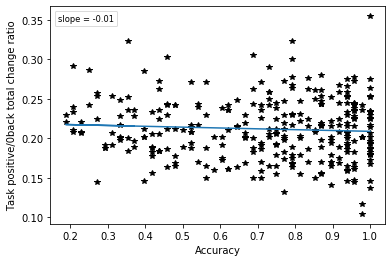

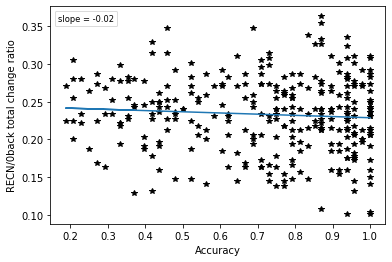

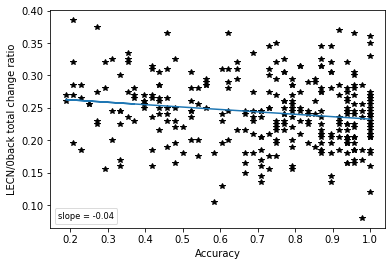

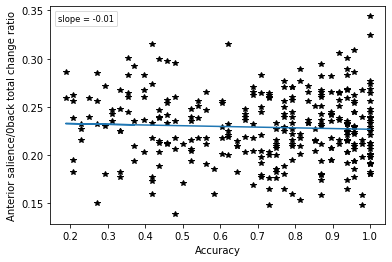

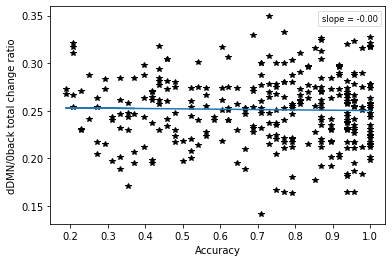

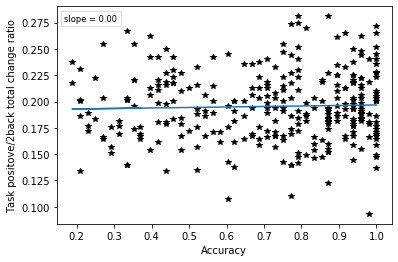

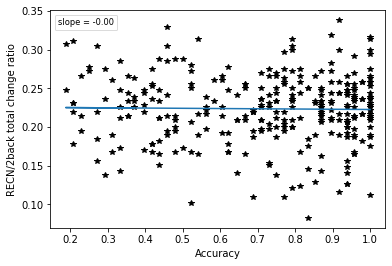

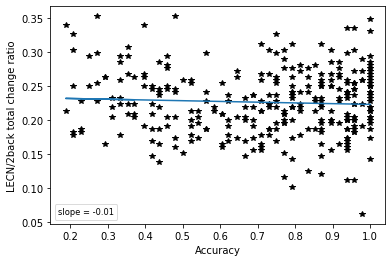

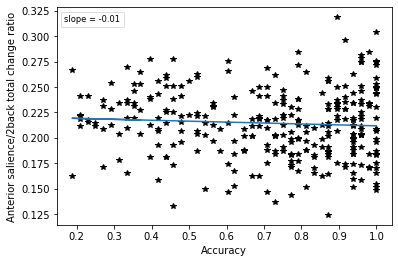

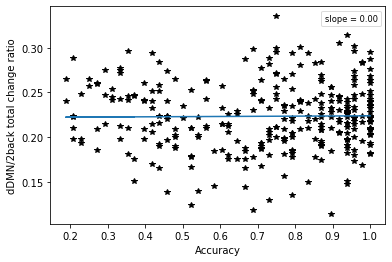

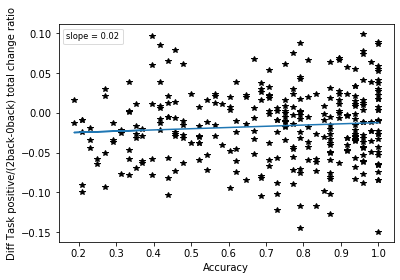

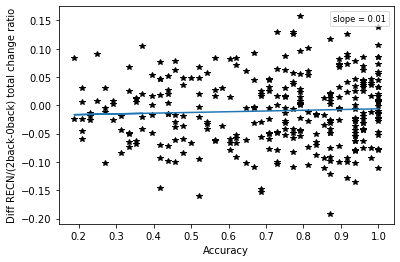

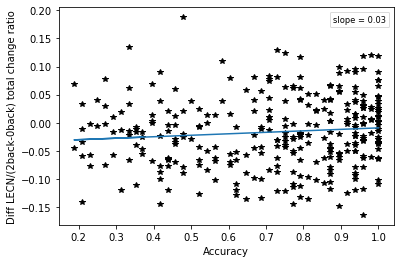

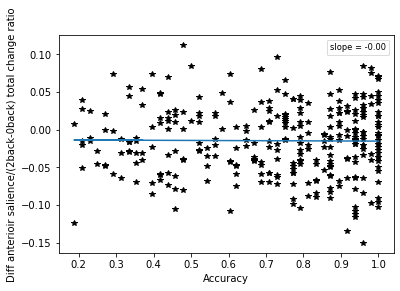

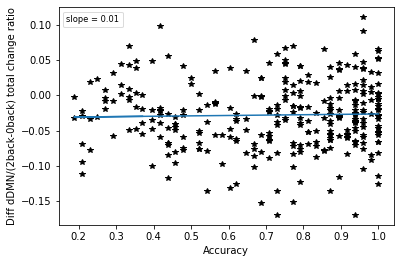

In [115]:
plt.figure()
plt.plot(score_vs_change[:,0],score_vs_change[:,1],"*",color="black")
m, b = np.polyfit(score_vs_change[:,0], score_vs_change[:,1], 1)
plt.plot(score_vs_change[:,0], m*score_vs_change[:,0] + b)
plt.ylabel("Task positive/0back total change ratio")
plt.xlabel("Accuracy")
labels = ["slope = %.2f"%m,]
plt.legend(handles, labels, loc='best', fontsize='small', fancybox=True, framealpha=0.7, handlelength=0, handletextpad=0)
plt.savefig("Task positove-0back total change ratio vs score.png")

plt.figure()
plt.plot(score_vs_change[:,0],score_vs_change[:,2],"*",color="black")
m, b = np.polyfit(score_vs_change[:,0], score_vs_change[:,2], 1)
plt.plot(score_vs_change[:,0], m*score_vs_change[:,0] + b)
plt.ylabel("RECN/0back total change ratio")
plt.xlabel("Accuracy")
labels = ["slope = %.2f"%m,]
plt.legend(handles, labels, loc='best', fontsize='small', fancybox=True, framealpha=0.7, handlelength=0, handletextpad=0)
plt.savefig("RECN-0back total change ratio vs score.png")

plt.figure()
plt.plot(score_vs_change[:,0],score_vs_change[:,3],"*",color="black")
m, b = np.polyfit(score_vs_change[:,0], score_vs_change[:,3], 1)
plt.plot(score_vs_change[:,0], m*score_vs_change[:,0] + b)
plt.ylabel("LECN/0back total change ratio")
plt.xlabel("Accuracy")
labels = ["slope = %.2f"%m,]
plt.legend(handles, labels, loc='best', fontsize='small', fancybox=True, framealpha=0.7, handlelength=0, handletextpad=0)
plt.savefig("LECN-0back total change ratio vs score.png")

plt.figure()
plt.plot(score_vs_change[:,0],score_vs_change[:,4],"*",color="black")
m, b = np.polyfit(score_vs_change[:,0], score_vs_change[:,4], 1)
plt.plot(score_vs_change[:,0], m*score_vs_change[:,0] + b)
plt.ylabel("Anterior salience/0back total change ratio")
plt.xlabel("Accuracy")
labels = ["slope = %.2f"%m,]
plt.legend(handles, labels, loc='best', fontsize='small', fancybox=True, framealpha=0.7, handlelength=0, handletextpad=0)
plt.savefig("AS-0back total change ratio vs score.png")

plt.figure()
plt.plot(score_vs_change[:,0],score_vs_change[:,5],"*",color="black")
m, b = np.polyfit(score_vs_change[:,0], score_vs_change[:,5], 1)
plt.plot(score_vs_change[:,0], m*score_vs_change[:,0] + b)
plt.ylabel("dDMN/0back total change ratio")
plt.xlabel("Accuracy")
labels = ["slope = %.2f"%m,]
plt.legend(handles, labels, loc='best', fontsize='small', fancybox=True, framealpha=0.7, handlelength=0, handletextpad=0)
plt.savefig("dDMN-0back total change ratio vs score.png")

plt.figure()
plt.plot(score_vs_change[:,0],score_vs_change[:,6],"*",color="black")
m, b = np.polyfit(score_vs_change[:,0], score_vs_change[:,6], 1)
plt.plot(score_vs_change[:,0], m*score_vs_change[:,0] + b)
plt.ylabel("Task positove/2back total change ratio")
plt.xlabel("Accuracy")
labels = ["slope = %.2f"%m,]
plt.legend(handles, labels, loc='best', fontsize='small', fancybox=True, framealpha=0.7, handlelength=0, handletextpad=0)
plt.savefig("Task positove-2back total change ratio vs score.png")

plt.figure()
plt.plot(score_vs_change[:,0],score_vs_change[:,7],"*",color="black")
m, b = np.polyfit(score_vs_change[:,0], score_vs_change[:,7], 1)
plt.plot(score_vs_change[:,0], m*score_vs_change[:,0] + b)
plt.ylabel("RECN/2back total change ratio")
plt.xlabel("Accuracy")
labels = ["slope = %.2f"%m,]
plt.legend(handles, labels, loc='best', fontsize='small', fancybox=True, framealpha=0.7, handlelength=0, handletextpad=0)
plt.savefig("RECN-2back total change ratio vs score.png")

plt.figure()
plt.plot(score_vs_change[:,0],score_vs_change[:,8],"*",color="black")
m, b = np.polyfit(score_vs_change[:,0], score_vs_change[:,8], 1)
plt.plot(score_vs_change[:,0], m*score_vs_change[:,0] + b)
plt.ylabel("LECN/2back total change ratio")
plt.xlabel("Accuracy")
labels = ["slope = %.2f"%m,]
plt.legend(handles, labels, loc='best', fontsize='small', fancybox=True, framealpha=0.7, handlelength=0, handletextpad=0)
plt.savefig("LECN-2back total change ratio vs score.png")

plt.figure()
plt.plot(score_vs_change[:,0],score_vs_change[:,9],"*",color="black")
m, b = np.polyfit(score_vs_change[:,0], score_vs_change[:,9], 1)
plt.plot(score_vs_change[:,0], m*score_vs_change[:,0] + b)
plt.ylabel("Anterior salience/2back total change ratio")
plt.xlabel("Accuracy")
labels = ["slope = %.2f"%m,]
plt.legend(handles, labels, loc='best', fontsize='small', fancybox=True, framealpha=0.7, handlelength=0, handletextpad=0)
plt.savefig("Anterior salience-2back total change ratio vs score.png")

plt.figure()
plt.plot(score_vs_change[:,0],score_vs_change[:,10],"*",color="black")
m, b = np.polyfit(score_vs_change[:,0], score_vs_change[:,10], 1)
plt.plot(score_vs_change[:,0], m*score_vs_change[:,0] + b)
plt.ylabel("dDMN/2back total change ratio")
plt.xlabel("Accuracy")
labels = ["slope = %.2f"%m,]
plt.legend(handles, labels, loc='best', fontsize='small', fancybox=True, framealpha=0.7, handlelength=0, handletextpad=0)
plt.savefig("dDMN-2back total change ratio vs score.png")



######################
#DIFFERENCES:
plt.figure()
plt.plot(score_vs_change[:,0],score_vs_change[:,6]-score_vs_change[:,1],"*",color="black")
m, b = np.polyfit(score_vs_change[:,0], score_vs_change[:,6]-score_vs_change[:,1], 1)
plt.plot(score_vs_change[:,0], m*score_vs_change[:,0] + b)
plt.ylabel("Diff Task positive/(2back-0back) total change ratio")
plt.xlabel("Accuracy")
labels = ["slope = %.2f"%m,]
plt.legend(handles, labels, loc='best', fontsize='small', fancybox=True, framealpha=0.7, handlelength=0, handletextpad=0)
plt.savefig("Diff total change ratio task positove.png")

plt.figure()
plt.plot(score_vs_change[:,0],score_vs_change[:,7]-score_vs_change[:,2],"*",color="black")
m, b = np.polyfit(score_vs_change[:,0], score_vs_change[:,7]-score_vs_change[:,2], 1)
plt.plot(score_vs_change[:,0], m*score_vs_change[:,0] + b)
plt.ylabel("Diff RECN/(2back-0back) total change ratio")
plt.xlabel("Accuracy")
labels = ["slope = %.2f"%m,]
plt.legend(handles, labels, loc='best', fontsize='small', fancybox=True, framealpha=0.7, handlelength=0, handletextpad=0)
plt.savefig("Diff total change ratio RECN.png")

plt.figure()
plt.plot(score_vs_change[:,0],score_vs_change[:,8]-score_vs_change[:,3],"*",color="black")
m, b = np.polyfit(score_vs_change[:,0], score_vs_change[:,8]-score_vs_change[:,3], 1)
plt.plot(score_vs_change[:,0], m*score_vs_change[:,0] + b)
plt.ylabel("Diff LECN/(2back-0back) total change ratio")
plt.xlabel("Accuracy")
labels = ["slope = %.2f"%m,]
plt.legend(handles, labels, loc='best', fontsize='small', fancybox=True, framealpha=0.7, handlelength=0, handletextpad=0)
plt.savefig("Diff total change ratio LECN.png")

plt.figure()
plt.plot(score_vs_change[:,0],score_vs_change[:,9]-score_vs_change[:,4],"*",color="black")
m, b = np.polyfit(score_vs_change[:,0], score_vs_change[:,9]-score_vs_change[:,4], 1)
plt.plot(score_vs_change[:,0], m*score_vs_change[:,0] + b)
plt.ylabel("Diff anterioir salience/(2back-0back) total change ratio")
plt.xlabel("Accuracy")
labels = ["slope = %.2f"%m,]
plt.legend(handles, labels, loc='best', fontsize='small', fancybox=True, framealpha=0.7, handlelength=0, handletextpad=0)
plt.savefig("Diff total change ratio AS.png")

plt.figure()
plt.plot(score_vs_change[:,0],score_vs_change[:,10]-score_vs_change[:,5],"*",color="black")
m, b = np.polyfit(score_vs_change[:,0], score_vs_change[:,10]-score_vs_change[:,5], 1)
plt.plot(score_vs_change[:,0], m*score_vs_change[:,0] + b)
plt.ylabel("Diff dDMN/(2back-0back) total change ratio")
plt.xlabel("Accuracy")
labels = ["slope = %.2f"%m,]
plt.legend(handles, labels, loc='best', fontsize='small', fancybox=True, framealpha=0.7, handlelength=0, handletextpad=0)
plt.savefig("Diff total change ratio dDMN.png")



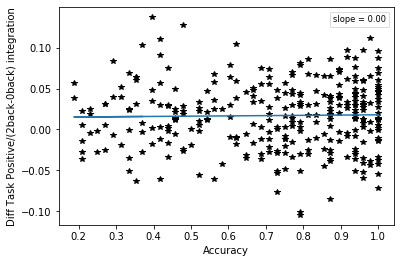

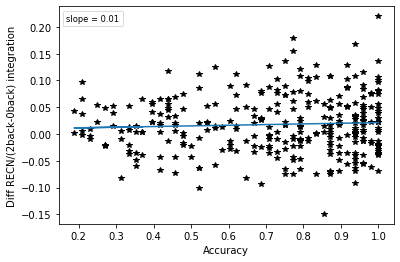

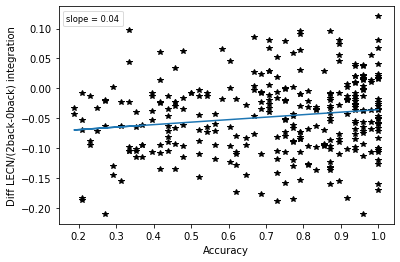

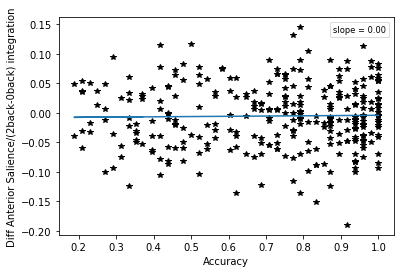

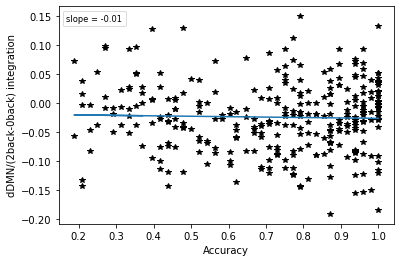

In [107]:
plt.figure()
plt.plot(score_vs_change[:,0],score_vs_change[:,4]-score_vs_change[:,1],"*",color="black")
m, b = np.polyfit(score_vs_change[:,0], score_vs_change[:,4]-score_vs_change[:,1], 1)
plt.plot(score_vs_change[:,0], m*score_vs_change[:,0] + b)
plt.ylabel("Diff Task Positive/(2back-0back) integration")
plt.xlabel("Accuracy")
labels = ["slope = %.2f"%m,]
plt.legend(handles, labels, loc='best', fontsize='small', fancybox=True, framealpha=0.7, handlelength=0, handletextpad=0)
plt.savefig("Diff total change ratio task positive.png")

plt.figure()
plt.plot(score_vs_change[:,0],score_vs_change[:,5]-score_vs_change[:,2],"*",color="black")
m, b = np.polyfit(score_vs_change[:,0], score_vs_change[:,5]-score_vs_change[:,2], 1)
plt.plot(score_vs_change[:,0], m*score_vs_change[:,0] + b)
plt.ylabel("Diff RECN/(2back-0back) integration")
plt.xlabel("Accuracy")
labels = ["slope = %.2f"%m,]
plt.legend(handles, labels, loc='best', fontsize='small', fancybox=True, framealpha=0.7, handlelength=0, handletextpad=0)
plt.savefig("Diff total change ratio RECN.png")

plt.figure()
plt.plot(score_vs_change[:,0],score_vs_change[:,6]-score_vs_change[:,3],"*",color="black")
m, b = np.polyfit(score_vs_change[:,0], score_vs_change[:,6]-score_vs_change[:,3], 1)
plt.plot(score_vs_change[:,0], m*score_vs_change[:,0] + b)
plt.ylabel("Diff LECN/(2back-0back) integration")
plt.xlabel("Accuracy")
labels = ["slope = %.2f"%m,]
plt.legend(handles, labels, loc='best', fontsize='small', fancybox=True, framealpha=0.7, handlelength=0, handletextpad=0)
plt.savefig("Diff total change ratio LECN.png")

plt.figure()
plt.plot(score_vs_change[:,0],score_vs_change[:,7]-score_vs_change[:,4],"*",color="black")
m, b = np.polyfit(score_vs_change[:,0], score_vs_change[:,7]-score_vs_change[:,4], 1)
plt.plot(score_vs_change[:,0], m*score_vs_change[:,0] + b)
plt.ylabel("Diff Anterior Salience/(2back-0back) integration")
plt.xlabel("Accuracy")
labels = ["slope = %.2f"%m,]
plt.legend(handles, labels, loc='best', fontsize='small', fancybox=True, framealpha=0.7, handlelength=0, handletextpad=0)
plt.savefig("Diff total change ratio AS.png")

plt.figure()
plt.plot(score_vs_change[:,0],score_vs_change[:,8]-score_vs_change[:,5],"*",color="black")
m, b = np.polyfit(score_vs_change[:,0], score_vs_change[:,8]-score_vs_change[:,5], 1)
plt.plot(score_vs_change[:,0], m*score_vs_change[:,0] + b)
plt.ylabel("dDMN/(2back-0back) integration")
plt.xlabel("Accuracy")
labels = ["slope = %.2f"%m,]
plt.legend(handles, labels, loc='best', fontsize='small', fancybox=True, framealpha=0.7, handlelength=0, handletextpad=0)
plt.savefig("Diff total change ratio dDMN.png")

In [209]:
Module_1 = np.sum(Total_change_2back[0,Module1_indices])/len(Module1_indices)

0.25142857142857145

In [ ]:
dmn_coords = list()
SavingAddress = "Needed_Address"
NumofBrainRegions = 246
for subject in lis:
    WinTot = np.load(SavingAddress+ '/%s/%s/Normalized/Normalized_WinningTot_%s.npy'%(subject,subject,subject))
    for reg in range(0,NumofBrainRegions):
        all_modules_spanned = len(np.unique(WinTot[:,reg]))
        if all_modules_spanned<=5:
            #print("sub %s"%subject,"region %d is core"%reg )
            #print(region_name([reg]))
            dmn_coords.append(region_coordinate([reg]))
        #print(all_modules_spanned)

get_colors = lambda n: list(map(lambda i: "#" + "%06x" % random.randint(0, 0xFFFFFF),range(n)))
view = plotting.view_markers(dmn_coords,get_colors(len(dmn_coords)), marker_size=10) # colors-->['red', 'cyan', 'magenta', 'orange']
view.open_in_browser() 

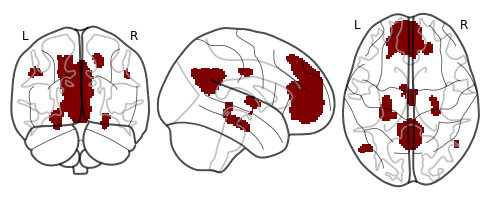

In [20]:
tmap_filename = "Needed_Address"
from nilearn import plotting
plotting.plot_glass_brain(tmap_filename,cmap="OrRd",colorbar=False)
plotting.show()

In [99]:
np.sort(score_vs_change[:,0])

array([0.02083333, 0.1875    , 0.1875    , 0.20833333, 0.20833333,
       0.20833333, 0.20833333, 0.22916667, 0.22916667, 0.22916667,
       0.25      , 0.25      , 0.27083333, 0.27083333, 0.27083333,
       0.27083333, 0.29166667, 0.29166667, 0.29166667, 0.3125    ,
       0.3125    , 0.3125    , 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.35416667, 0.35416667,
       0.35416667, 0.35416667, 0.35416667, 0.37      , 0.37      ,
       0.37      , 0.37      , 0.39583333, 0.39583333, 0.39583333,
       0.39583333, 0.39583333, 0.41666667, 0.41666667, 0.41666667,
       0.41666667, 0.41666667, 0.41666667, 0.41666667, 0.4375    ,
       0.4375    , 0.4375    , 0.4375    , 0.4375    , 0.4375    ,
       0.4375    , 0.4375    , 0.45833333, 0.45833333, 0.45833333,
       0.45833333, 0.45833333, 0.45833333, 0.45833333, 0.47916667,
       0.47916667, 0.47916667, 0.47916667, 0.47916667, 0.47916667,
       0.5       , 0.5       , 0.52083333, 0.52083333, 0.52083